# important imports

In [1]:
import sys
sys.path.append('..')

In [2]:
from src.config import RAW_DATA_PATH
from src.utils import load_data

# Basic Data Understanding

In [3]:
df = load_data(RAW_DATA_PATH)

c:\Users\user\Documents\Datasience\complaint-analysis\notebooks\..\src\utils.py:15: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


In [4]:
df.head() 

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,FL,32092,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195687
1,2025-06-20,Debt collection,Telecommunications debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company can't verify or dispute the facts in t...,"Eastern Account Systems of Connecticut, Inc.",FL,342XX,NaN,NaN,Web,2025-06-20,Closed with explanation,Yes,NaN,14195688
2,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195689
3,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195690
4,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,Experian Information Solutions Inc.,IL,60628,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195692


In [5]:
df.shape, df.info(), df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9609797 entries, 0 to 9609796
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 1.3+

((9609797, 18),
 None,
        Complaint ID
 count  9.609797e+06
 mean   8.092744e+06
 std    3.774842e+06
 min    1.000000e+00
 25%    5.038016e+06
 50%    8.448508e+06
 75%    1.129591e+07
 max    1.423259e+07)

In [6]:
df.isna().sum()

Date received                         0
Product                               0
Sub-product                      235295
Issue                                 6
Sub-issue                        839522
Consumer complaint narrative    6629041
Company public response         4770207
Company                               0
State                             54516
ZIP code                          30228
Tags                            8981029
Consumer consent provided?      1649561
Submitted via                         0
Date sent to company                  0
Company response to consumer         20
Timely response?                      0
Consumer disputed?              8841498
Complaint ID                          0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

# Eda analysis

# 


Product Distribution:
 Product
Credit reporting or other personal consumer reports                             4834855
Credit reporting, credit repair services, or other personal consumer reports    2163857
Debt collection                                                                  799197
Mortgage                                                                         422254
Checking or savings account                                                      291178
Credit card                                                                      226686
Credit card or prepaid card                                                      206369
Money transfer, virtual currency, or money service                               145066
Credit reporting                                                                 140429
Student loan                                                                     109717
Bank account or service                                                           86205


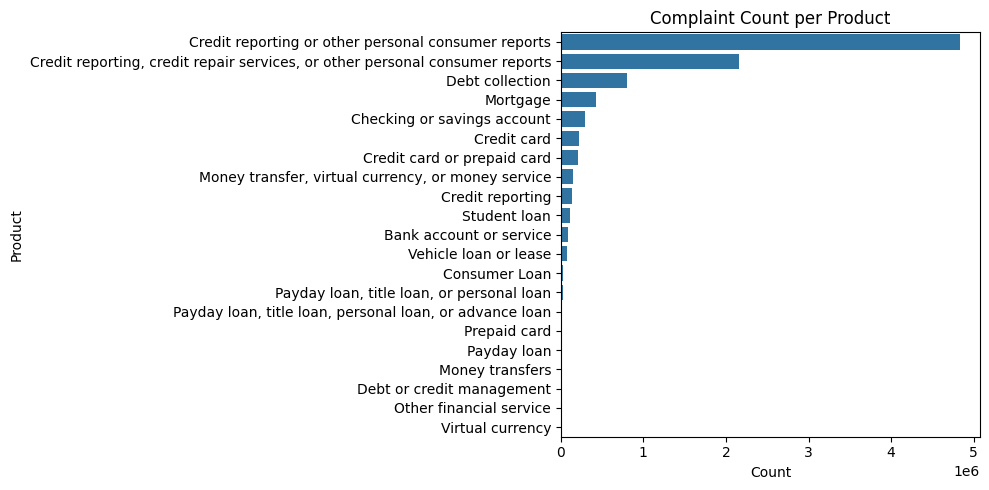

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
product_counts = df["Product"].value_counts()
print("\nProduct Distribution:\n", product_counts)

plt.figure(figsize=(10, 5))
sns.countplot(data=df, y="Product", order=product_counts.index)
plt.title("Complaint Count per Product")
plt.xlabel("Count")
plt.ylabel("Product")
plt.tight_layout()
plt.show()

count    9.609797e+06
mean     5.446667e+01
std      1.497672e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      5.000000e+01
max      6.469000e+03
Name: NarrativeLength, dtype: float64


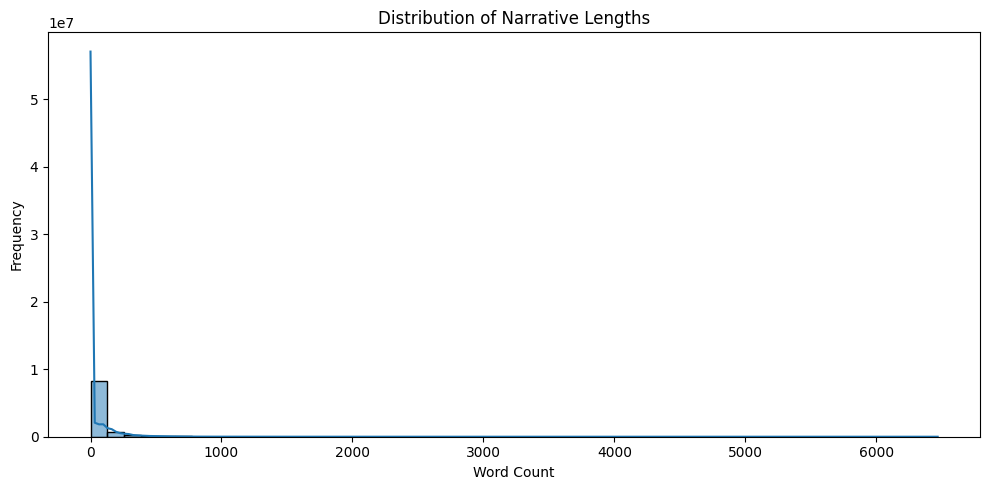

In [9]:
# Add word count column
df["NarrativeLength"] = df["Consumer complaint narrative"].fillna("").apply(lambda x: len(x.split()))

# Basic stats
print(df["NarrativeLength"].describe())

# Plot the distribution
plt.figure(figsize=(10, 5))
sns.histplot(df["NarrativeLength"], bins=50, kde=True)
plt.title("Distribution of Narrative Lengths")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [10]:
total = len(df)
missing_narratives = df["Consumer complaint narrative"].isna().sum()
print(f"Complaints without narratives: {missing_narratives} / {total} ({missing_narratives/total:.2%})")

Complaints without narratives: 6629041 / 9609797 (68.98%)


In [11]:
# Show unique product values
print("\nUnique Product Values:")
for product in sorted(df["Product"].dropna().unique()):
    print("-", product)


Unique Product Values:
- Bank account or service
- Checking or savings account
- Consumer Loan
- Credit card
- Credit card or prepaid card
- Credit reporting
- Credit reporting or other personal consumer reports
- Credit reporting, credit repair services, or other personal consumer reports
- Debt collection
- Debt or credit management
- Money transfer, virtual currency, or money service
- Money transfers
- Mortgage
- Other financial service
- Payday loan
- Payday loan, title loan, or personal loan
- Payday loan, title loan, personal loan, or advance loan
- Prepaid card
- Student loan
- Vehicle loan or lease
- Virtual currency


# Data processing

## filtering data

In [12]:
from src.data_processing import run_pipeline, generate_visuals

✅ Removed 0 duplicate rows.
✅ Dropped 6629041 rows with missing narratives.
🔍 Filtering target products...
🧹 Cleaning narratives...
📊 Handling outliers...
✅ Removed 209 extreme outlier narratives (>3000 words).

📈 Generating EDA visuals...


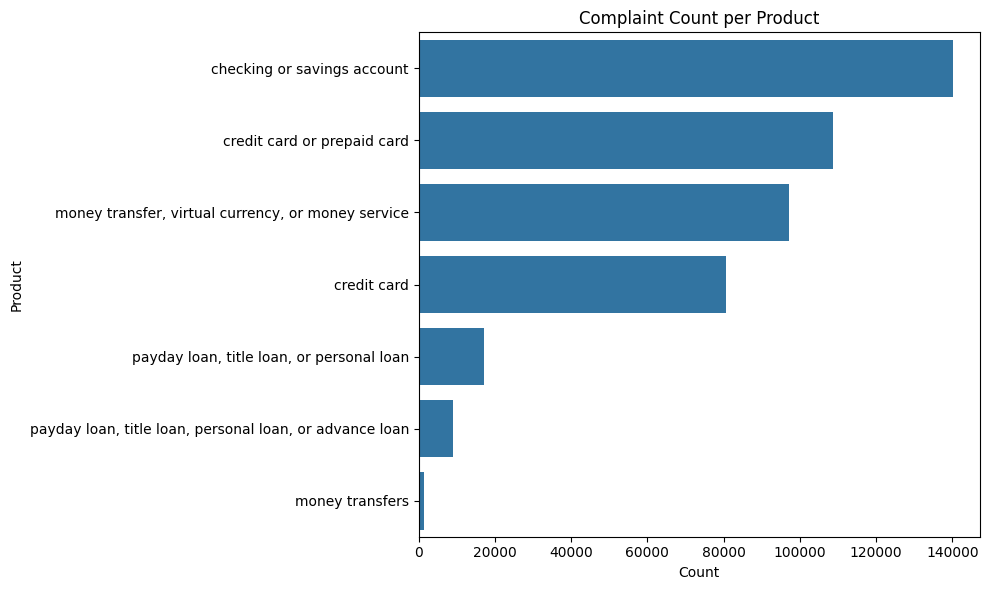

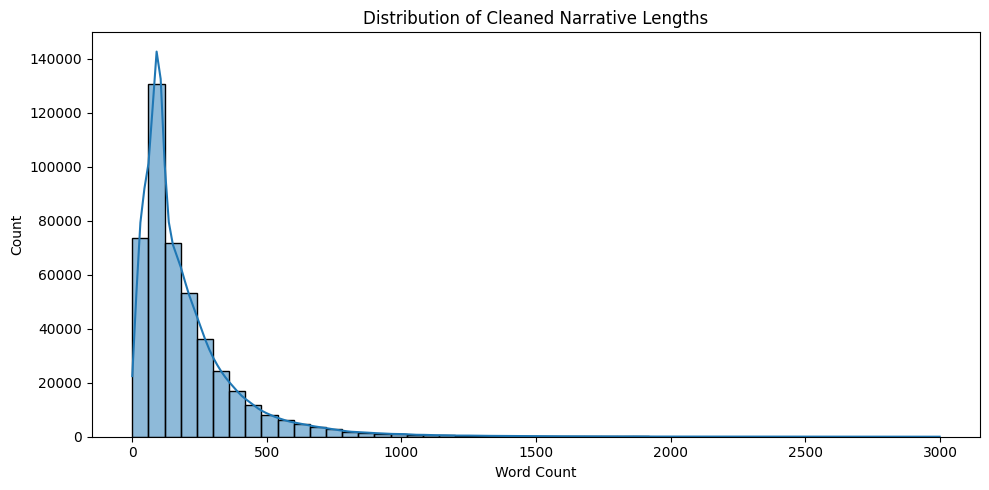

In [13]:
df_cleaned = run_pipeline(df)
generate_visuals(df_cleaned)

In [17]:
df_cleaned = df_cleaned.fillna("N/A")

In [20]:
from src.config import PROCESSED_DATA_PATH
from src.utils import save_data

In [21]:
save_data(df_cleaned, PROCESSED_DATA_PATH)

True